<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#get-data" data-toc-modified-id="get-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>get data</a></span></li><li><span><a href="#pearson-correlation-for-TEWL-in-between-all-pairs-within-25-subjects" data-toc-modified-id="pearson-correlation-for-TEWL-in-between-all-pairs-within-25-subjects-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>pearson correlation for TEWL in between all pairs within 25 subjects</a></span><ul class="toc-item"><li><span><a href="#grouping-based-on-correlation-for-Flextend" data-toc-modified-id="grouping-based-on-correlation-for-Flextend-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>grouping based on correlation for Flextend</a></span></li><li><span><a href="#grouping-based-on-correlation-for-Ceraplus" data-toc-modified-id="grouping-based-on-correlation-for-Ceraplus-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>grouping based on correlation for Ceraplus</a></span></li></ul></li><li><span><a href="#for-individuals-flatten-out-in-A,-are-they-likely-to-flatten-out-in-B-(have-similar-response)?" data-toc-modified-id="for-individuals-flatten-out-in-A,-are-they-likely-to-flatten-out-in-B-(have-similar-response)?-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>for individuals flatten out in A, are they likely to flatten out in B (have similar response)?</a></span></li></ul></div>

** This file is an attempt to group subjects based on the correlation in between subjects. 
The method was not adopted eventually, so this file is mostly for reference.


# get data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.anova import AnovaRM
from scipy.stats import ttest_rel
from scipy.stats import mannwhitneyu
from scipy.stats import describe
from scipy.stats import ttest_ind
from scipy.stats import wilcoxon
import seaborn as sb

path = '~/Desktop/v1Data/'
name = ['S20-20_Sorted_TEWL_V1_4Sponsor.xlsx','S20-20_Sorted_Erythema_V1_4Sponsor.xlsx','S20-20_Sorted_Denudation_V1_4Sponsor.xlsx']

# read pH
pHdf = pd.read_excel('~/Desktop/v1Data/S20-20_pH_V1_4Sponsor.xlsx',sheet_name='pH')
pHdf.head()

dc = {'ID':[],'IPtype':[],'time':[],'TEWL':[],'Erythema':[],'Denudation':[],'pH':[]}
all_time = [0,3,5,6]
num_par = 25
num_type = 2
time = 4
for i in range(num_par):
    for j in range(len(all_time)):
        dc['ID'] += [i+1]
        dc['IPtype'] += ['A']
        dc['time'] += [all_time[j]]
        dc['pH'] += [pHdf['pH'].iloc[i]]
for i in range(num_par):
    for j in range(len(all_time)):
        dc['ID'] += [i+1]
        dc['IPtype'] += ['B']
        dc['time'] += [all_time[j]]
        dc['pH'] += [pHdf['pH'].iloc[i]]
        
key = ['TEWL','Erythema','Denudation']
v11AB = {}
for doc in range(len(name)):
# for doc in range(2,3):
    v11=pd.read_excel(path+name[doc],sheet_name='v1-1')
    v11 = v11.reset_index(drop=True)
    v11_A = v11.iloc[:,:5];
    v11_A = v11_A.rename(columns={"#":"id","A BL": "0", "A 3": "3", "A 5": "5", "A 6": "6"})
    v11_A.insert(1,'IP','A')
    v11_B = v11.iloc[:,[0,5,6,7,8]];
    v11_B = v11_B.rename(columns={"#":"id","B BL": "0", "B 3": "3", "B 5": "5", "B 6": "6"})
    v11_B.insert(1,'IP','B')
    v11AB[key[doc]+"_A"] = v11_A
    v11AB[key[doc]+"_B"] = v11_B

    for i in range(v11_A.shape[0]):
        for j in range(len(all_time)):
            dc[key[doc]] += [(v11_A.iloc[i])[str(all_time[j])]]

    for i in range(v11_B.shape[0]):
        for j in range(len(all_time)):
            dc[key[doc]] += [(v11_B.iloc[i])[str(all_time[j])]]

dfall = pd.DataFrame(dc)
dfall.head()


,ID,IPtype,time,TEWL,Erythema,Denudation,pH
0,1,A,0,3.455,0,0,6.630000
1,1,A,3,9.760,2,0,6.630000
2,1,A,5,48.000,4,2,6.630000
3,1,A,6,68.475,6,2,6.630000
4,2,A,0,2.825,0,0,6.446667


In [2]:
df_tewl = pd.concat([v11AB['TEWL_A'],v11AB['TEWL_B']])
df_tewl.head()

,id,IP,0,3,5,6
0,1,A,3.455,9.76,48.000,68.475
1,2,A,2.825,2.61,9.495,17.370
2,3,A,3.220,13.94,41.250,53.725
3,4,A,3.515,18.59,57.540,78.340
4,5,A,4.905,28.52,68.465,77.770


In [52]:
dfA = df_tewl[df_tewl.IP=='A']
dfA = dfA.iloc[:,2:6]
dfA = dfA.rename(columns={"0":0, "3":3, "5":5, "6":6})
dfA = dfA.T
dfA.columns = np.arange(1,26,1)

In [53]:
dfB = df_tewl[df_tewl.IP=='B']
dfB = dfB.iloc[:,2:6]
dfB = dfB.rename(columns={"0":0, "3":3, "5":5, "6":6})
dfB = dfB.T
dfB.columns = np.arange(1,26,1)

# pearson correlation for TEWL in between all pairs within 25 subjects

<AxesSubplot:>

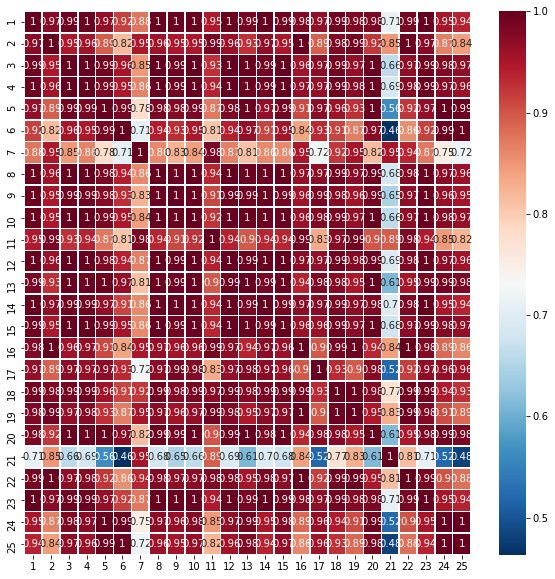

In [54]:
pearsoncorr = (dfA).corr(method='pearson')
fig, ax = plt.subplots(figsize=(10,10))  
sb.heatmap(pearsoncorr, 
#             xticklabels=[1,2,3,4,5],
#             yticklabels=[1,2,3,4,5],
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5,
            ax = ax)

## grouping based on correlation for Flextend

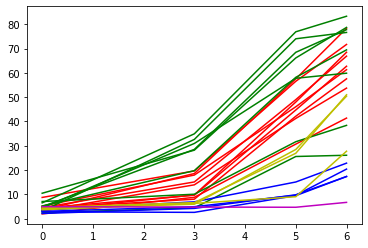

In [55]:
arrayA = []
arrayA += [[1,3,4,8,10,12,14,15,23]] # no change 3-6
arrayA += [[5,9,20,13,24,6,25,17]] # flatten 5-6 
arrayA += [[2,11,19,18]] # steeper 5-6
arrayA += [[16,22,7]]# steeper 5-6 steeper 3-5
arrayA += [[21]] # different from all other ones
color = ['r','g','b','y','m']
for group in range(len(arrayA)):
    for i in arrayA[group]:
        plt.plot(dfA[i],c=color[group])
#         plt.legend(array)
plt.show()

## grouping based on correlation for Ceraplus

<AxesSubplot:>

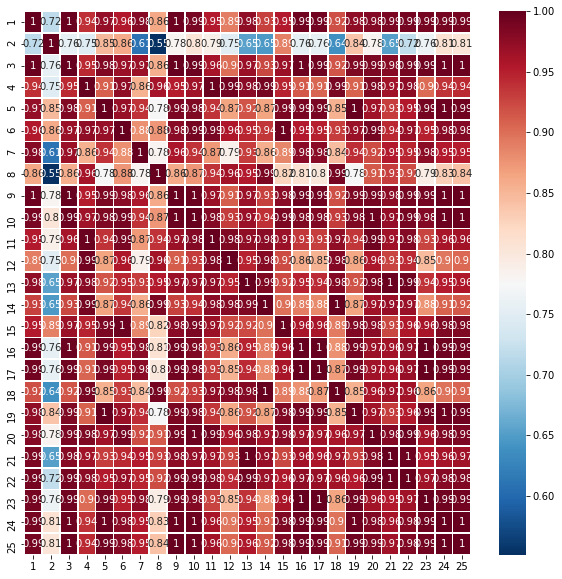

In [56]:
# dfA_drop = dfA.drop(labels=[7,21],axis=1)
pearsoncorr = dfB.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10,10))  
sb.heatmap(pearsoncorr, 
#             xticklabels=[1,2,3,4,5],
#             yticklabels=[1,2,3,4,5],
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5,
            ax = ax)

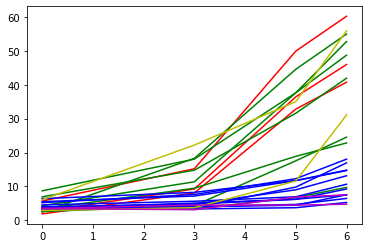

In [57]:
arrayB = []
arrayB += [[16,17,23]] # steep 3-5 flatten 5-6
arrayB += [[1,3,24,25,19,5,21]] # slope doesn't change much
arrayB += [[20,22,9,10,4,15,11,12,13,8,18]] # flat 3-5 steep 5-6
arrayB += [[14,6]] #steep 3-5 steep 5-6
arrayB += [[2,7]] # very low overall

color = ['r','g','b','y','m']
for group in range(len(arrayB)):
    for i in arrayB[group]:
        plt.plot(dfB[i],c=color[group])
#         plt.legend(array)
plt.show()

# for individuals flatten out in A, are they likely to flatten out in B (have similar response)?

In [58]:
dfA = dfA.T
dfA['6-5'] = dfA[6] - dfA[5]
dfA['5-3'] = (dfA[5] - dfA[3])/2
dfA['3-0'] = (dfA[3] - dfA[0])/3

In [59]:
dfB = dfB.T
dfB['6-5'] = dfB[6] - dfB[5]
dfB['5-3'] = (dfB[5] - dfB[3])/2
dfB['3-0'] = (dfB[3] - dfB[0])/3

In [60]:
from scipy.stats import spearmanr
spearmanr(dfA['6-5'],dfB['6-5'])

SpearmanrResult(correlation=-0.08692307692307692, pvalue=0.6794980246772079)

In [61]:
from scipy.stats import pearsonr
pearsonr(dfA['6-5'],dfB['6-5'])

(-0.16101901989521372, 0.44194366692724324)

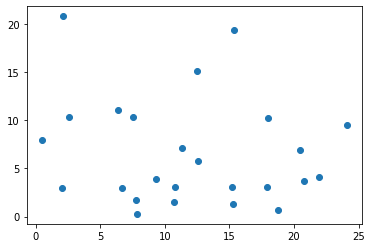

In [62]:
#### per peel increase for A vs per peel increase for B at peel5 to peel6
plt.scatter(dfA['6-5'],dfB['6-5'])

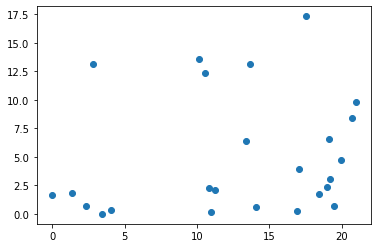

In [63]:
#### per peel increase for A vs per peel increase for B at peel 3 to peel 5
plt.scatter(dfA['5-3'],dfB['5-3'])

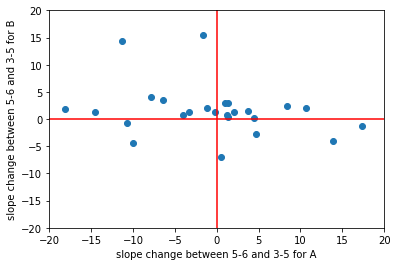

In [91]:
#### change in [per peel TEWL change] between peel5 - peel6 and peel3 to peel5
plt.scatter(dfA['6-5']-dfA['5-3'],dfB['6-5']-dfB['5-3'])
plt.xlim([-20,20])
plt.ylim([-20,20])
plt.xlabel('slope change between 5-6 and 3-5 for A')
plt.ylabel('slope change between 5-6 and 3-5 for B')
plt.axhline(y=0, color='r', linestyle='-')
plt.axvline(x=0, color='r', linestyle='-')

- There doesn't seem to be relationship between slope change of A and B of time 3-5 and 5-6. 
- However, we can tell from the distribution that most individuals when treated with ceraplus (B) has a steeper slope of TEWL from 5-6 compared to the averaged value of 3-5, but this is not true with flextend (A) at the same time. This could be because that flextend already peeled off much contents during time 3-5, and the content coming off starts to decrease as we reach time 6. On the other hand, ceraplus sites are still peeling off much content even after time 6. This maybe justifieds that ceraplus is more gental. 

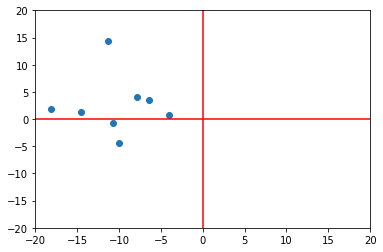

In [84]:
A65flatten = dfA.iloc[np.array(arrayA[1])-1,4]
A53flatten = dfA.iloc[np.array(arrayA[1])-1,5]
B65flatten = dfB.iloc[np.array(arrayA[1])-1,4]
B53flatten = dfB.iloc[np.array(arrayA[1])-1,5]

plt.scatter(A65flatten-A53flatten,B65flatten-B53flatten)
plt.xlim([-20,20])
plt.ylim([-20,20])
plt.axhline(y=0, color='r', linestyle='-')
plt.axvline(x=0, color='r', linestyle='-')

For the flattened group of A, averaged increase of TEWL from time 3 to 5 tends to be greater than the increase of TEWL from time 5 to 6. These individuals, however, do have exert the same behavior for B. 6/8 of the individuals in flattened group A, have a steeper slope at time 5-6 than time 3-5. 

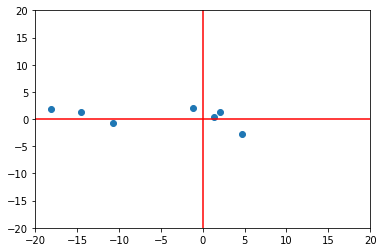

In [86]:
A65flatten = dfA.iloc[np.array(arrayB[1])-1,4]
A53flatten = dfA.iloc[np.array(arrayB[1])-1,5]
B65flatten = dfB.iloc[np.array(arrayB[1])-1,4]
B53flatten = dfB.iloc[np.array(arrayB[1])-1,5]

plt.scatter(A65flatten-A53flatten,B65flatten-B53flatten)
plt.xlim([-20,20])
plt.ylim([-20,20])
plt.axhline(y=0, color='r', linestyle='-')
plt.axvline(x=0, color='r', linestyle='-')

For the flattened group of B, averaged increase of TEWL from time 3 to 5 tends to be greater than the increase of TEWL from time 5 to 6. 4/7 of the individuals in flattened group B, have a flatten slope at time 5-6 than time 3-5, so there doesn't seem to be any effect correspond to flattened group of B to A.

In [11]:
# ! jupyter nbconvert --to html_toc pearsoncorr.ipynb 

[NbConvertApp] Converting notebook pearsoncorr.ipynb to html_toc
[NbConvertApp] Support files will be in pearsoncorr_files\
[NbConvertApp] Making directory pearsoncorr_files
[NbConvertApp] Making directory pearsoncorr_files
[NbConvertApp] Making directory pearsoncorr_files
[NbConvertApp] Making directory pearsoncorr_files
[NbConvertApp] Making directory pearsoncorr_files
[NbConvertApp] Making directory pearsoncorr_files
[NbConvertApp] Making directory pearsoncorr_files
[NbConvertApp] Making directory pearsoncorr_files
[NbConvertApp] Making directory pearsoncorr_files
[NbConvertApp] Writing 340650 bytes to pearsoncorr.html


In [15]:
! jupyter nbconvert pearsoncorr.ipynb --template toc2

[NbConvertApp] Converting notebook pearsoncorr.ipynb to html
[NbConvertApp] Writing 951189 bytes to pearsoncorr.html
